# Kız Başına Veri Analizi Bootcamp
## Final Case 1 - Havayolu Yolcu Memnuniyeti Analizi

### Bu projede, havayolu yolcu memnuniyetini etkileyen faktörler analiz edilmiştir. Veri seti üzerinde istatistiksel özetleme, eksik ve aykırı değer incelemesi ile temel görselleştirme teknikleri uygulanmıştır.

## 1. Veri Seti Seçimi

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}\n")
print(df.head())

Satır sayısı: 103904
Sütun sayısı: 25

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...      

## 2. İstatistiksel Analiz

In [2]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


## 3. Eksik Değer Analizi
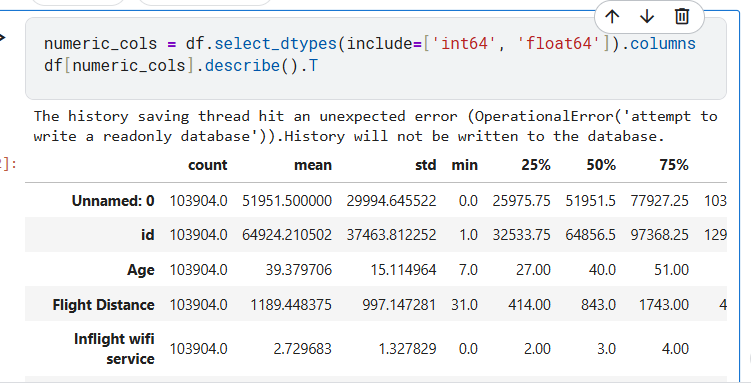

In [3]:
# Eksik değer kontrolü
print(df.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [4]:
# Eksik veriyi tanımlama, NaN yaparak standartlaştırma

# Örnek: boş string olanları NaN yap
df.replace("", pd.NA, inplace=True)

# Örnek: 'Unknown' olanları NaN yap
df.replace("Unknown", pd.NA, inplace=True)

# Örnek: -1 veya 999 gibi eksikliği simgeleyen sayıları NaN yap
df.replace([-1, 999], pd.NA, inplace=True)

# Sonra tekrar eksik değer sayısını kontrol et
print(df.isnull().sum())


Unnamed: 0                             1
id                                     1
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                       30
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
# Veri setindeki NaN değerleri tespit etme ve yüzdesini gösterme

missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

missing_percentage = (missing_counts / len(df)) * 100

import pandas as pd

missing_data = pd.DataFrame({
    'Eksik Değer Sayısı': missing_counts,
    'Yüzde (%)': missing_percentage
})

print(missing_data)

                          Eksik Değer Sayısı  Yüzde (%)
Arrival Delay in Minutes                 310   0.298352
Flight Distance                           30   0.028873
Unnamed: 0                                 1   0.000962
id                                         1   0.000962


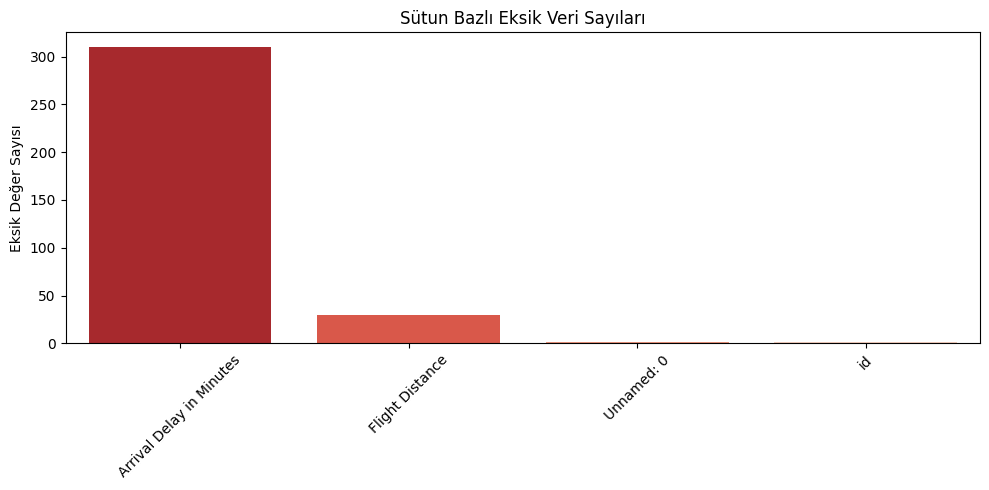

In [6]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='Reds_r')
plt.xticks(rotation=45)
plt.ylabel('Eksik Değer Sayısı')
plt.title('Sütun Bazlı Eksik Veri Sayıları')
plt.tight_layout()
plt.show()


## 4. Aykırı Değer (Outlier) Analizi

In [8]:
df.fillna({
    'Arrival Delay in Minutes': 0, # bilinmeyeni 0 yapar
    'Flight Distance': df['Flight Distance'].mean() # bilinmeyene ortalama yazar.
}, inplace=True)

In [9]:
Q1 = df['Arrival Delay in Minutes'].quantile(0.25)
Q3 = df['Arrival Delay in Minutes'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırlar
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers = df[(df['Arrival Delay in Minutes'] < lower_bound) | (df['Arrival Delay in Minutes'] > upper_bound)]
print(f"Aykırı değer sayısı: {len(outliers)}")

Aykırı değer sayısı: 13954


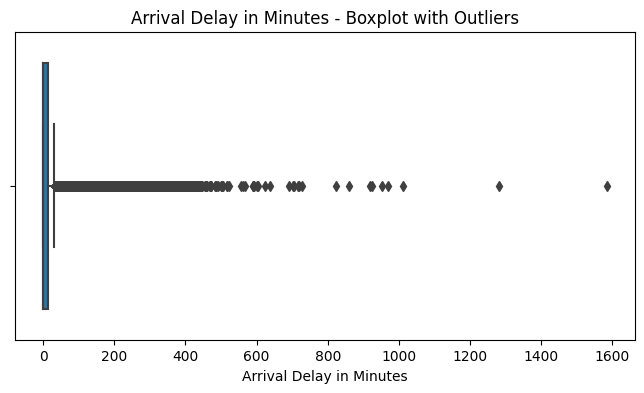

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.title('Arrival Delay in Minutes - Boxplot with Outliers')
plt.show()

## 5. Görsellleştirme 

In [14]:
# Uç değerleri temizleme
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)

### 5.1 Sayısal Değişkenleri Görselleştirme

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

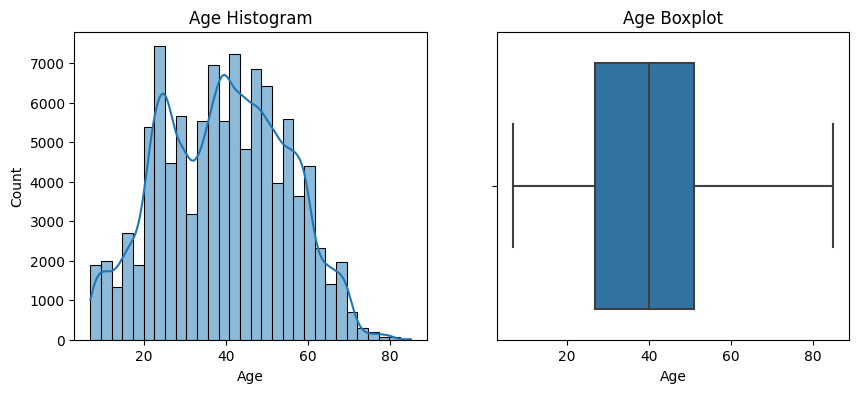

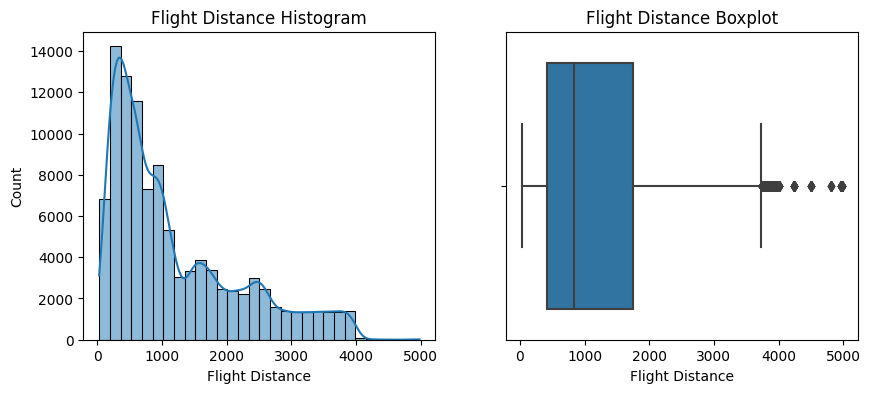

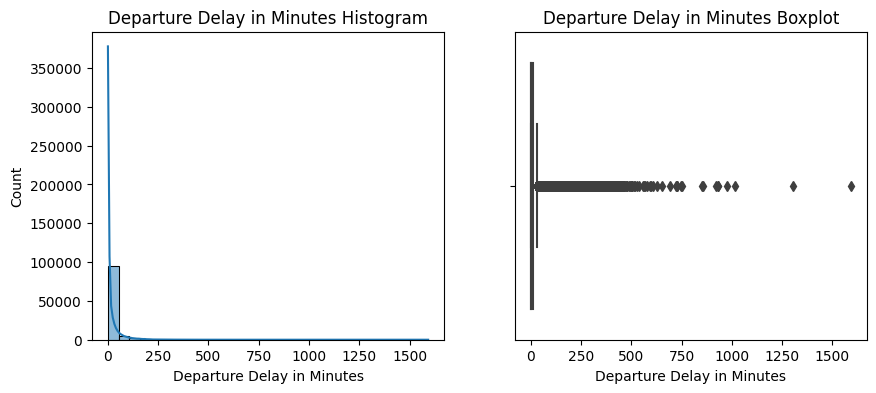

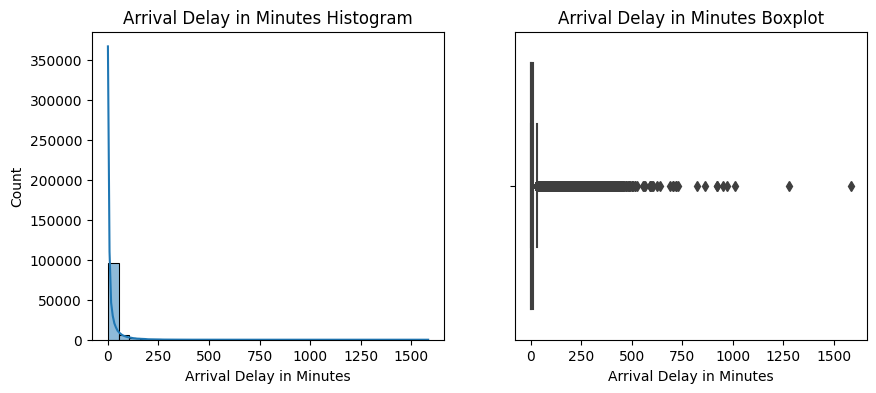

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for col in numeric_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Histogram')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')

    plt.show()

### 5.2 Kategorik Değişkenleri Görselleştirme

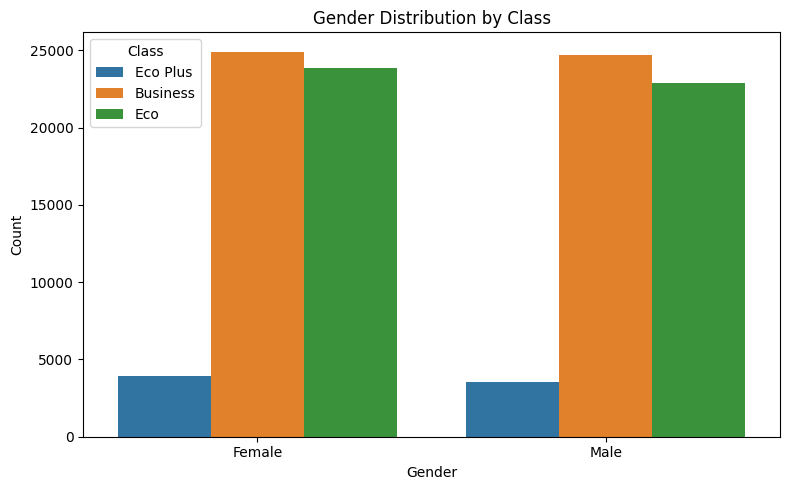

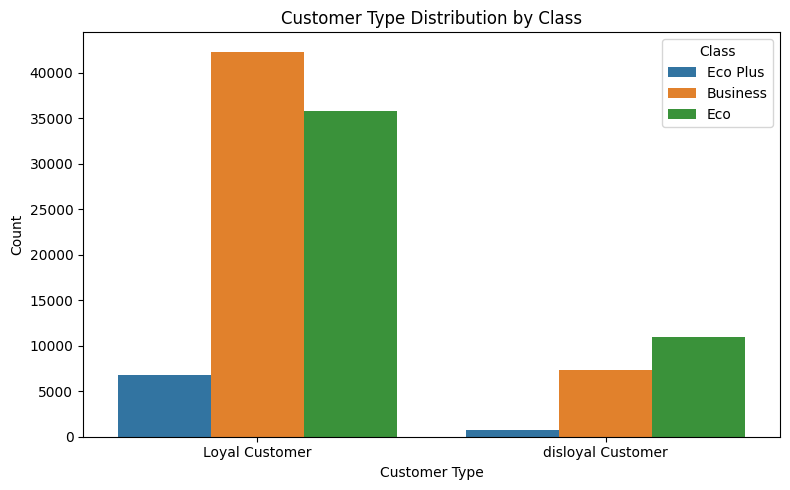

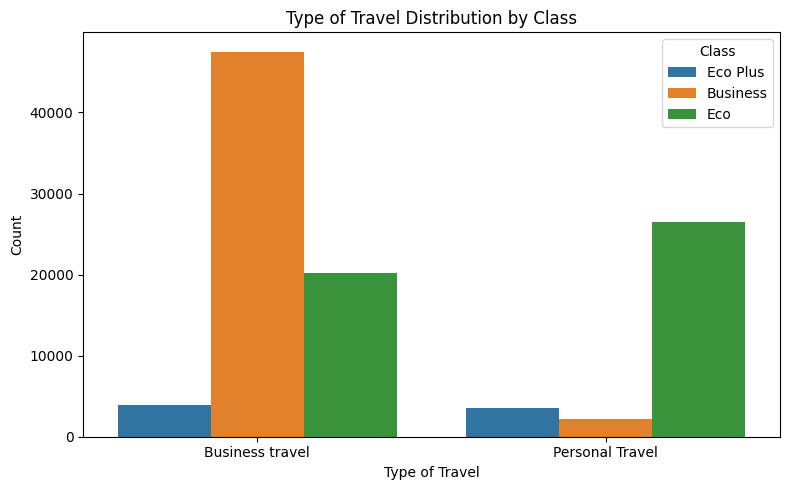

In [15]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel']

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue='Class', order=df[col].value_counts().index)
    plt.title(f'{col} Distribution by Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Class')
    plt.tight_layout()
    plt.show()


### 5.3 Yolcuların Uçuş Sınıfına (Class) Göre Memnuniyet Dağılımı (satisfaction)  

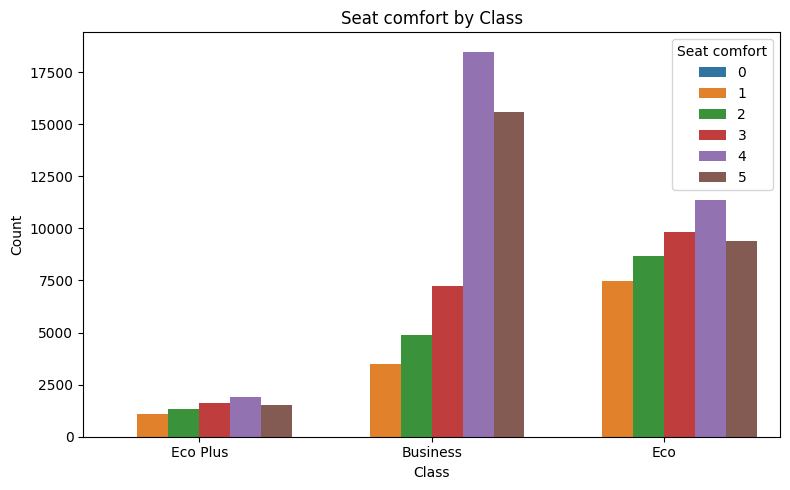

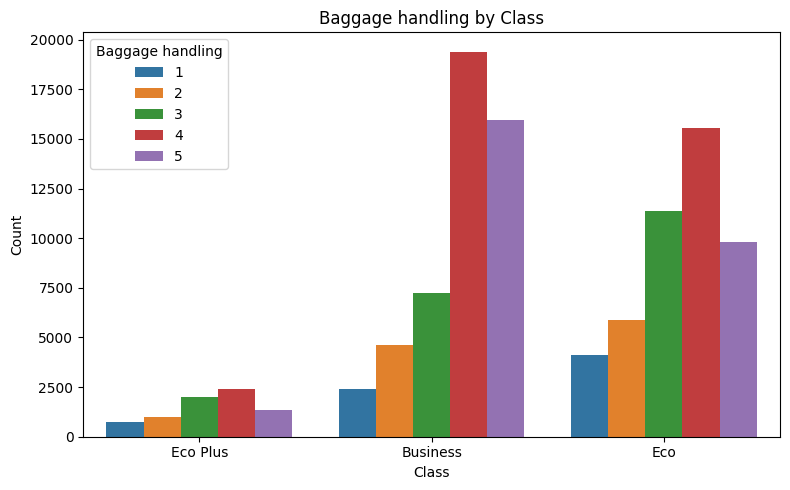

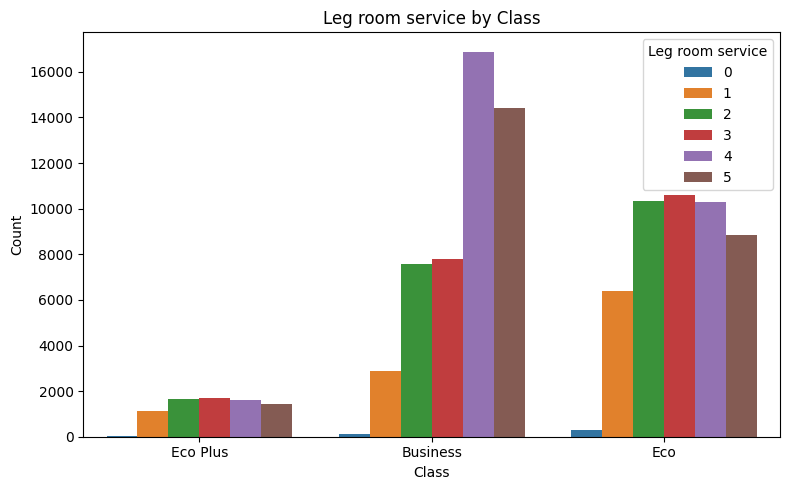

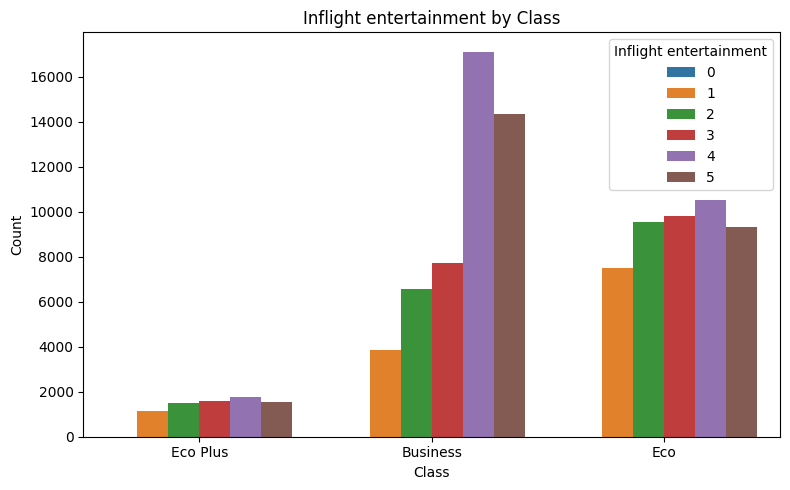

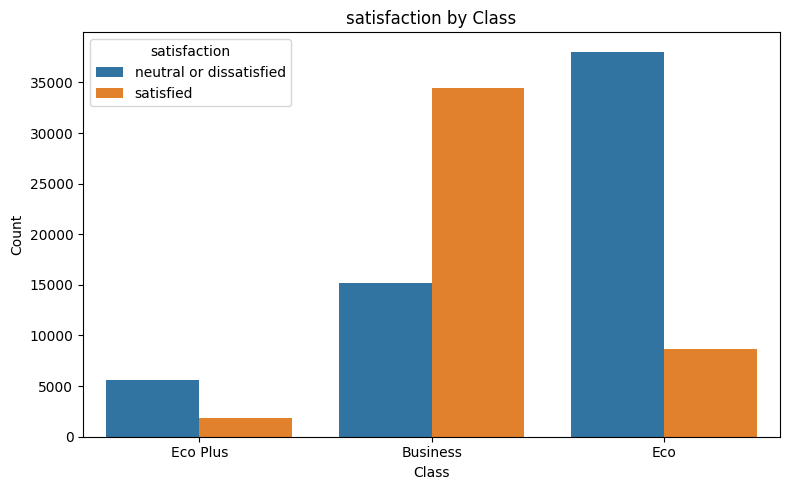

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

factor_cols = ['Seat comfort', 'Baggage handling', 'Leg room service', 'Inflight entertainment' ,'satisfaction']

for col in factor_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Class', hue=col)
    plt.title(f'{col} by Class')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.tight_layout()
    plt.show()



## 6. Sonuç 

### Case sonunda, veri seti istatistiksel yöntemlerle sayısal olarak incelenmiş, eksik ve aykırı değerler tespit edilip uygun şekilde ele alınmıştır. Ayrıca çeşitli grafiklerle görselleştirilerek, sınıf ve müşteri memnuniyeti arasındaki ilişkiye dair anlamlı yorumlar yapılabilecek hale gelmiştir.